<a href="https://colab.research.google.com/github/cuboid0223/Deep-Generative-Models/blob/main/DNN_Handwriting%EF%BC%BFKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
from keras.datasets import mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


這句程式碼是用於載入MNIST數據集的一部分，它是一個常用於機器學習和深度學習的數字圖像數據集，其中包含手寫數字0到9的圖像。

這句程式碼的具體意義如下：

- `mnist.load_data()` 是一個函數調用，用於從Keras庫中載入MNIST數據集。
- `(X_train, y_train)` 和 `(X_test, y_test)` 是將數據集分為兩個部分的變數賦值。通常，數據集被分成訓練集（`X_train` 和 `y_train`）和測試集（`X_test` 和 `y_test`）。
  - `X_train` 包含訓練圖像數據，即手寫數字的圖像。
  - `y_train` 包含與 `X_train` 中的每個圖像相對應的標籤（或類別），即每個圖像表示的是哪個數字（0到9之一）。
  - `X_test` 包含測試圖像數據，用於在訓練後評估模型的性能。
  - `y_test` 包含與 `X_test` 中的每個測試圖像相對應的真實標籤。

總之，這句程式碼的目的是從MNIST數據集中載入訓練和測試數據，以便在機器學習或深度學習項目中使用。這些數據將用於訓練機器學習模型，以便模型可以識別手寫數字。


In [6]:
len(X_train)

60000

In [7]:
len(X_test)

10000

In [8]:
X_train[0].shape

(28, 28)

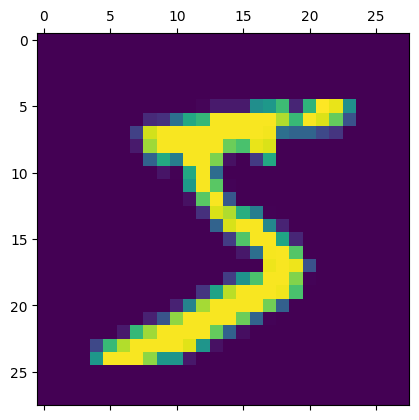

In [9]:
plt.matshow(X_train[0])

plt.matshow()  將 28 X 28 的 Matrix 來顯示圖像

In [10]:
y_train[0]

5

In [11]:
X_train = X_train / 255
X_test = X_test / 255

將 `X_train` 和 `X_test` 數據除以 255 的操作是為了進行數據歸一化（Normalization）。這是一個常見的預處理步驟，用於將像素值縮放到一個特定的範圍，以便模型更容易訓練並提高訓練的穩定性。在這個情境下，255 是因為像素值的範圍通常在 0 到 255 之間。

這種歸一化的好處包括：

1. **加速收斂**：將像素值縮放到0到1之間有助於模型在訓練期間更快地收斂。這是因為在小範圍內的數值操作更容易進行，減少了梯度下降等優化算法的運算量。

2. **避免梯度爆炸**：在深度學習中，大數值可能導致梯度爆炸的問題，使模型難以訓練。通過歸一化，可以減少這種情況的發生。

3. **提高模型穩定性**：數據歸一化有助於確保不同特徵之間的數值範圍差距不會對模型產生不必要的影響。這對於深度神經網絡的穩定訓練非常重要。

4. **更好的一般化能力**：模型在正規化後更容易推廣到看不見的數據，因為它學會了處理歸一化數據。

總之，將像素值除以 255 是一種常見的數據預處理步驟，用於確保數據處於適當的範圍，以便訓練深度學習模型。這在處理圖像數據時特別常見，因為圖像像素值通常在0到255之間。

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

這句程式碼是用於將MNIST數據集中的圖像數據轉換成一維數組的操作。具體來說，這是將二維的圖像數據轉換為一維數組，以便它們可以作為機器學習模型的輸入。

解釋如下：

1. `X_train` 和 `X_test` 是分別包含訓練數據和測試數據的變數。這些數據是MNIST數據集中的手寫數字圖像，通常是28x28像素的二維數組。

2. `X_train_flattened` 和 `X_test_flattened` 是新的變數，它們存儲了經過轉換的數據。`reshape` 函數用於執行這種轉換。

3. `reshape(len(X_train), 28*28)` 的意思是將 `X_train` 數據集中的每個圖像（原始為28x28像素）轉換為一個具有28*28=784個元素的一維數組。同樣，對於測試數據 `X_test` 也執行相同的轉換。

這樣的轉換對於某些機器學習模型，特別是DNN（深度神經網絡）非常有用，因為它們通常期望一維數組作為輸入。在這種情況下，原始的圖像數據被攤平成一個長向量，以便模型可以更容易地處理它們。

In [14]:
X_train_flattened.shape

(60000, 784)

In [15]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4723 - accuracy: 0.8766
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3036 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2728 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9254


這段程式碼是使用Keras建立、編譯和訓練一個深度神經網絡（DNN）模型來進行手寫數字分類的任務。以下是程式碼的詳細說明：

建立模型：

使用 keras.Sequential 創建一個順序（Sequential）模型。順序模型是Keras中最簡單的模型類型，它由一個或多個網絡層按照順序堆疊而成。
在模型中添加一個 keras.layers.Dense 層。這是一個全連接層（Dense Layer），用於建立模型的第一層。它有10個神經元，輸入維度是784（這對應於攤平的圖像數據 28 * 28），並使用Sigmoid激活函數。
編譯模型：

使用 model.compile 函數編譯模型。在這一步中，需要指定優化器（optimizer）、損失函數（loss function）和評估指標（metrics）。
優化器選擇了 'adam'，這是一種常用的優化算法。
損失函數選擇了 'sparse_categorical_crossentropy'，這是一個常用於多類別分類問題的損失函數。
評估指標選擇了 'accuracy'，這將用於評估模型的性能。
訓練模型：

使用 model.fit 函數將模型訓練在訓練數據 X_train_flattened 上。y_train 是訓練數據的標籤（即手寫數字的實際值）。
epochs=5 指定了訓練的迭代次數，模型將在訓練數據上運行5個迭代，每個迭代中多次更新權重以優化性能。
總之，這段程式碼建立了一個簡單的DNN模型，該模型用於對手寫數字進行分類。模型在訓練數據上進行了5個迭代，以學習如何將輸入的784維數據映射到10個不同的數字類別，同時最小化分類錯誤的損失函數。該模型的性能將使用準確度（accuracy）指標進行評估。


In [17]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2663 - accuracy: 0.9241


[0.2663429379463196, 0.9240999817848206]

這段程式碼是用於評估先前訓練的深度神經網絡（DNN）模型在測試數據上的性能。具體來說，它計算了模型在測試數據上的損失（loss）和指定的評估指標（metrics），並返回這些值。

以下是程式碼的詳細說明：

- `model.evaluate(X_test_flattened, y_test)`：這是一個模型評估的函數調用，其中 `X_test_flattened` 是測試數據的特徵數據（攤平後的圖像數據），`y_test` 是測試數據的實際標籤（即手寫數字的真實值）。

- 函數的執行會計算模型在測試數據上的性能指標，包括損失和任何在模型編譯時指定的評估指標。通常，評估指標是在 `model.compile` 階段指定的，這個程式碼片段中我們知道已經指定了 `metrics=['accuracy']`。

- 函數將返回一個包含評估結果的列表，其中包括損失值和任何其他指定的評估指標的值。對於上述程式碼中指定的 `metrics=['accuracy']`，評估結果列表的第一個元素將是損失值，第二個元素將是準確度（accuracy）。

總之，這段程式碼用於評估DNN模型在測試數據上的性能，並返回模型在測試數據上的損失值和準確度（或任何其他指定的評估指標）。這有助於了解模型在未見過的數據上的表現如何。

In [18]:
y_predicted = model.predict(X_test_flattened)
y_predicted[5]

313/313 [==============================] - 1s 2ms/step


array([5.4318156e-05, 9.9712378e-01, 4.2574355e-01, 4.6212974e-01,
       9.2750881e-03, 2.0760406e-02, 9.3608461e-03, 6.6340250e-01,
       5.5695164e-01, 1.6524027e-01], dtype=float32)

這段程式碼是用於使用之前訓練的深度神經網絡（DNN）模型對測試數據集 `X_test_flattened` 進行預測。具體來說，它計算模型對測試集中的第6個樣本（索引為5）的預測結果。

以下是程式碼的詳細說明：

1. `y_predicted = model.predict(X_test_flattened)`：這行程式碼用於對測試數據 `X_test_flattened` 進行預測。`model.predict` 函數接受特徵數據 `X_test_flattened` 作為輸入，並返回模型對每個樣本的預測結果。`y_predicted` 是一個包含所有測試樣本預測結果的數組。

2. `y_predicted[5]`：這行程式碼用於檢索 `y_predicted` 中的第6個元素（索引為5），即模型對測試數據集中第6個樣本的預測結果。這個結果可能是一個包含多個數字的數組，每個數字表示模型對不同數字類別的預測概率。

總之，這段程式碼是用於獲取模型對測試數據集中特定樣本的預測結果。通常，這樣的預測結果可以用於評估模型的性能，比如計算準確度或生成分類報告，以了解模型在不同數字類別上的表現。

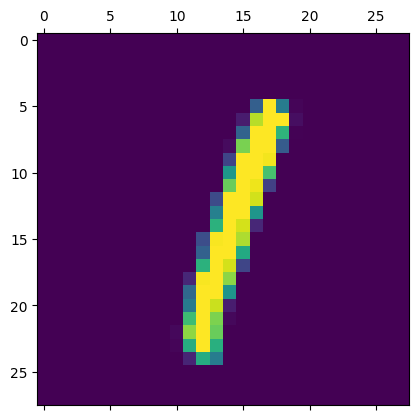

In [22]:
plt.matshow(X_test[5])

In [21]:
np.argmax(y_predicted[5])

1

這段程式碼是使用NumPy庫的`argmax`函數來找到一個數組中的最大值的索引。具體來說，它的目的是找到模型對測試數據集中第6個樣本（索引為5）的預測中具有最高概率的數字類別的索引。

以下是程式碼的詳細說明：

1. `np` 是NumPy庫的一個慣例縮寫，通常在Python中用於進行數值計算。

2. `y_predicted[5]`：這部分獲取模型對測試數據集中第6個樣本的預測結果。這個結果通常是一個包含多個數字（類別）的數組，每個數字表示模型對不同類別的預測概率。

3. `np.argmax(y_predicted[5])`：這部分使用`argmax`函數找到`y_predicted[5]` 中具有最大值的數字的索引。換句話說，它找到了模型認為最有可能的數字類別的索引。

總之，這段程式碼的目的是從模型的預測中找到最有可能的數字類別，並返回該類別的索引。這在分類任務中很有用，因為它允許您確定模型對給定輸入的預測結果。

In [24]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

這段程式碼是使用列表推導式（List Comprehension）來將模型對測試數據集的預測轉換為數字標籤的列表。具體來說，它將每個預測結果中具有最高概率的類別索引提取出來，以得到一個包含數字標籤的列表。

以下是程式碼的詳細說明：

1. `y_predicted` 是模型對測試數據集的預測結果，通常是一個包含多個數字（類別）的數組，每個數字表示模型對不同類別的預測概率。

2. `[np.argmax(i) for i in y_predicted]` 是列表推導式的語法。它遍歷`y_predicted` 中的每個預測結果 `i`，並對每個預測結果使用`np.argmax(i)`，這將找到`i` 中具有最大值的索引，即最有可能的類別索引。

3. 最終，它將這些最有可能的類別索引組成一個新的列表 `y_predicted_labels`，這個列表包含了模型對測試數據集的每個樣本的預測數字標籤。

總之，這段程式碼的目的是從模型的預測中提取最有可能的類別，以得到一個包含數字標籤的列表，這對於評估模型的性能以及進行分類任務非常有用。

In [26]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

這段程式碼是用來顯示模型對測試數據集中前5個樣本的預測數字標籤。具體來說，它提取了 `y_predicted_labels` 列表中的前5個元素，這個列表包含了模型對測試數據集的預測數字標籤。

以下是程式碼的詳細說明：

- `y_predicted_labels` 是一個列表，其中包含了模型對測試數據集的每個樣本的預測數字標籤。這個列表是在之前的程式碼中生成的，使用了列表推導式將模型的預測結果轉換為數字標籤。

- `y_predicted_labels[:5]`：這部分使用切片操作，選取 `y_predicted_labels` 列表中的前5個元素。換句話說，它返回一個包含模型對前5個測試樣本的預測數字標籤的子列表。

總之，這段程式碼的目的是顯示模型對測試數據集中前5個樣本的預測數字標籤，以便您可以查看模型的預測結果。




In [27]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    2,    2,    0,    5,    6,    3,    2,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   6,    9,  911,   20,    8,    3,   13,   11,   46,    5],
       [   1,    0,   14,  935,    0,   16,    2,   11,   22,    9],
       [   1,    1,    2,    2,  912,    0,   12,    5,    9,   38],
       [   8,    2,    2,   42,   11,  755,   16,   10,   38,    8],
       [  10,    3,    5,    1,    7,   12,  914,    2,    4,    0],
       [   1,    5,   20,    7,    5,    0,    0,  957,    3,   30],
       [   5,    6,    5,   26,    9,   21,    9,   14,  869,   10],
       [  10,    7,    1,   11,   25,    4,    0,   27,    6,  918]],
      dtype=int32)>

這段程式碼是使用TensorFlow中的`tf.math.confusion_matrix`函數來計算混淆矩陣（Confusion Matrix）。混淆矩陣是在分類問題中用來評估模型性能的一種重要工具。具體來說，它用於計算模型的預測與實際觀測值之間的交叉表格，以便評估模型在不同類別上的性能。

以下是程式碼的詳細說明：

1. `tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)`：這行程式碼調用了`tf.math.confusion_matrix`函數，用於計算混淆矩陣。函數的兩個參數分別是：
   - `labels`：這是實際的標籤或觀測值。在這個情境中，它是測試數據集 `y_test` 中的真實標籤，表示手寫數字的真實值。
   - `predictions`：這是模型的預測。在這個情境中，它是模型對測試數據的預測 `y_predicted_labels`，表示模型預測的數字標籤。

2. `cm`：這行程式碼將混淆矩陣的計算結果存儲在變數 `cm` 中。混淆矩陣是一個二維的數組，其中行代表實際類別，列代表預測類別。每個元素表示模型對特定類別的預測情況，例如，混淆矩陣的 (i, j) 元素表示模型將實際類別 i 預測為類別 j 的次數。

總之，這段程式碼的目的是計算混淆矩陣，以評估模型在不同類別上的性能。混淆矩陣提供了關於模型的分類準確度、誤分類和其他性能指標的重要信息。您可以使用混淆矩陣來進一步分析模型的性能，例如計算準確度、精確度、召回率等指標。

Text(95.72222222222221, 0.5, 'Truth')

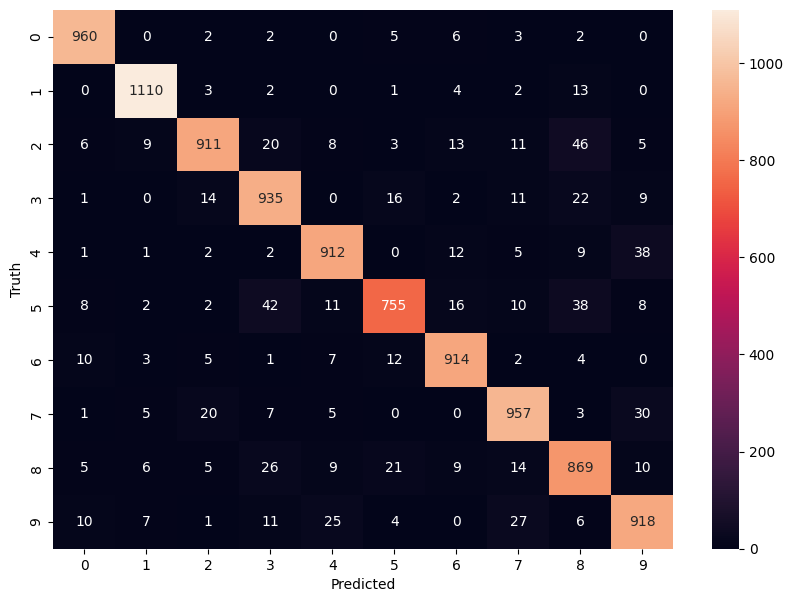

In [28]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

這段程式碼使用了Python中的Matplotlib和Seaborn庫來可視化混淆矩陣（Confusion Matrix）。混淆矩陣是用於評估分類模型性能的一個重要工具。以下是程式碼的詳細說明：

1. `import seaborn as sn`：這行程式碼導入了Seaborn庫，Seaborn是一個Python數據可視化庫，通常用於繪製更美觀和信息豐富的圖表。

2. `plt.figure(figsize=(10, 7))`：這行程式碼創建了一個新的圖形，並指定了其大小為寬度10單位和高度7單位，以便更好地顯示混淆矩陣。

3. `sn.heatmap(cm, annot=True, fmt='d')`：這部分用於繪製熱圖（Heatmap），其中包括混淆矩陣 `cm` 的可視化表示。
   - `cm` 是之前計算的混淆矩陣。
   - `annot=True` 意味著在熱圖上顯示數字，每個單元格將包含混淆矩陣中的數字值。
   - `fmt='d'` 指定了數字格式，即顯示整數值。

4. `plt.xlabel('Predicted')` 和 `plt.ylabel('Truth')`：這兩行程式碼分別用於設置x軸和y軸的標籤。在這個情境中，x軸的標籤是“Predicted”（預測值），y軸的標籤是“Truth”（實際值），這有助於解釋混淆矩陣的內容。

總之，這段程式碼的目的是使用Seaborn庫繪製混淆矩陣的熱圖，以便更容易理解模型在不同類別上的性能。熱圖提供了一個視覺化的方式來顯示模型的預測結果，並突顯了模型的正確預測和錯誤預測。

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2713 - accuracy: 0.9216
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1231 - accuracy: 0.9640
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0869 - accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0647 - accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0515 - accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0409 - accuracy: 0.9878
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0333 - accuracy: 0.9895
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0278 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0232 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0

這段程式碼是使用Keras建立、編譯和訓練一個深度神經網絡（DNN）模型，該模型用於進行手寫數字的分類任務。以下是程式碼的詳細說明：

1. **建立模型**：
   - 使用 `keras.Sequential` 創建一個順序（Sequential）模型。順序模型是Keras中最簡單的模型類型，它由一個或多個網絡層按照順序堆疊而成。
   - 第一層是 `keras.layers.Flatten` 層，用於將輸入的二維圖像（28x28像素）攤平成一維數組，以便模型可以處理它們。`input_shape=(28, 28)` 指定了輸入的形狀。
   - 第二層是 `keras.layers.Dense` 層，包含100個神經元，並使用ReLU（Rectified Linear Unit）激活函數。
   - 第三層是 `keras.layers.Dense` 層，包含10個神經元，並使用Sigmoid激活函數。這是輸出層，用於預測手寫數字的10個不同類別。

2. **編譯模型**：
   - 使用 `model.compile` 函數編譯模型。在這一步中，需要指定優化器（optimizer）、損失函數（loss function）和評估指標（metrics）。
   - 優化器選擇了 `'adam'`，這是一種常用的優化算法。
   - 損失函數選擇了 `'sparse_categorical_crossentropy'`，這是一個常用於多類別分類問題的損失函數。
   - 評估指標選擇了 `'accuracy'`，這將用於評估模型的性能。

3. **訓練模型**：
   - 使用 `model.fit` 函數將模型訓練在訓練數據 `X_train` 上。`y_train` 是訓練數據的標籤（即手寫數字的真實值）。
   - `epochs=10` 指定了訓練的迭代次數，模型將在訓練數據上運行10個迭代，每個迭代中多次更新權重以優化性能。

總之，這段程式碼建立了一個簡單的DNN模型，該模型用於對手寫數字進行分類。模型的訓練過程將優化權重以最小化多類別交叉熵損失，同時使用準確度（accuracy）評估性能。

In [31]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0815 - accuracy: 0.9753


[0.08153562992811203, 0.9753000140190125]

Accuracy: 97.5%